In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C://Users//RISENETWORKS_AI//Downloads//netflix_data.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
# the shape of the dataset
df.shape

(6234, 12)

In [5]:
# missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# drop unwanted columns 
df.drop(['director','cast','country', 'description'],axis = 1 , inplace=True)

In [9]:
# Drop rows with missing values (if necessary)
df.dropna(inplace=True)

In [13]:
# Count unique values in categorical columns (e.g., 'type', 'rating', 'listed_in')
type_counts = df['type'].value_counts()
rating_counts = df['rating'].value_counts()

In [14]:
type_counts

Movie      4257
TV Show    1957
Name: type, dtype: int64

In [15]:
rating_counts

TV-MA       2025
TV-14       1695
TV-PG        699
R            508
PG-13        286
NR           217
PG           184
TV-Y7        168
TV-G         149
TV-Y         142
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

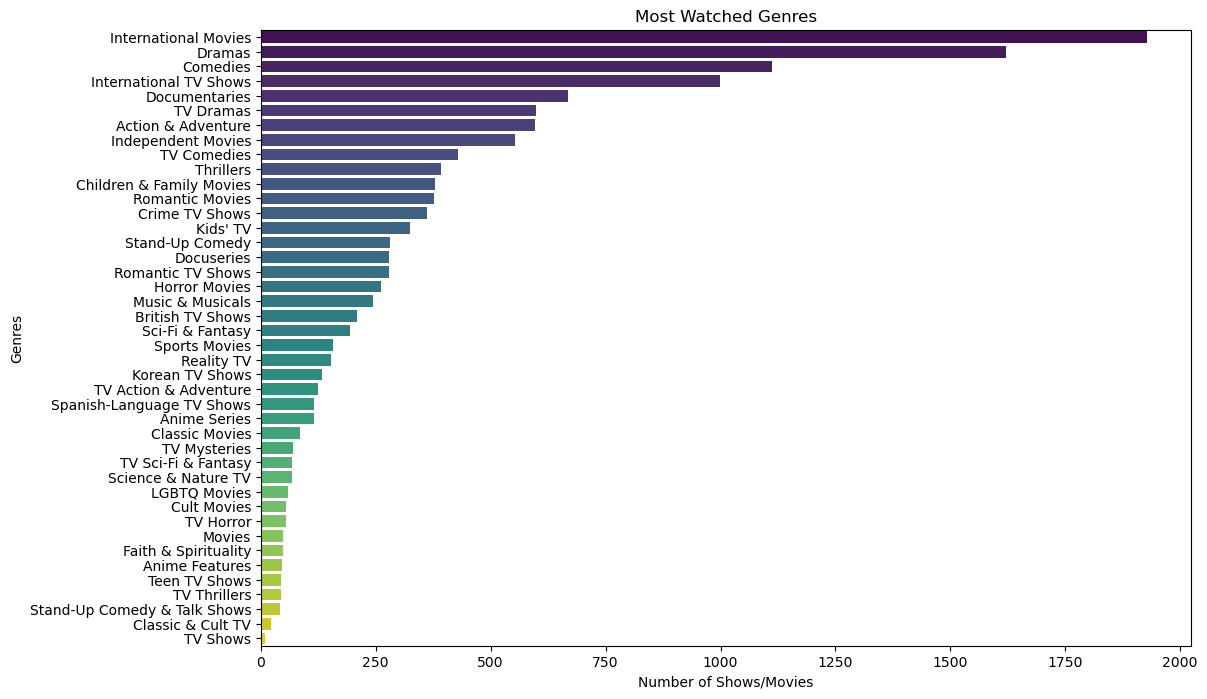

In [16]:
# Split the 'listed_in' column by commas and count the occurrences of each genre
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()

# Plot the most popular genres
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Most Watched Genres')
plt.xlabel('Number of Shows/Movies')
plt.ylabel('Genres')
plt.show()


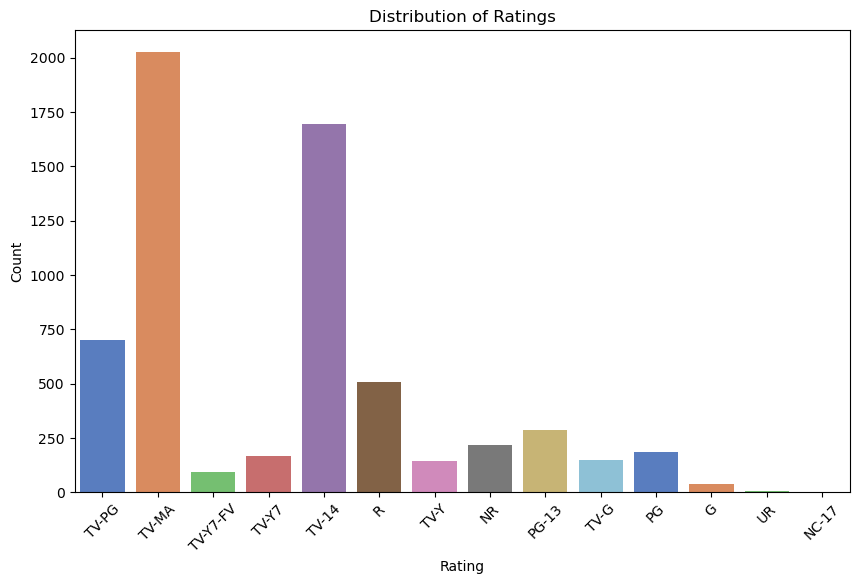

In [17]:
# Plotting the ratings distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', palette='muted')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()